In [3]:
import pandas as pd

In [4]:
file_path = '/content/QVI_transaction_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)
print(df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [5]:
# Check for missing values
print(df.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [6]:
#Cheak for data types of the attributes
print(df.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [7]:
#summary statistices of the dataset
print(df.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [8]:
#cheacking for outliers by visualizing the dataset
import seaborn as sns
import matplotlib.pyplot as plt

*Indentifying Outliers*

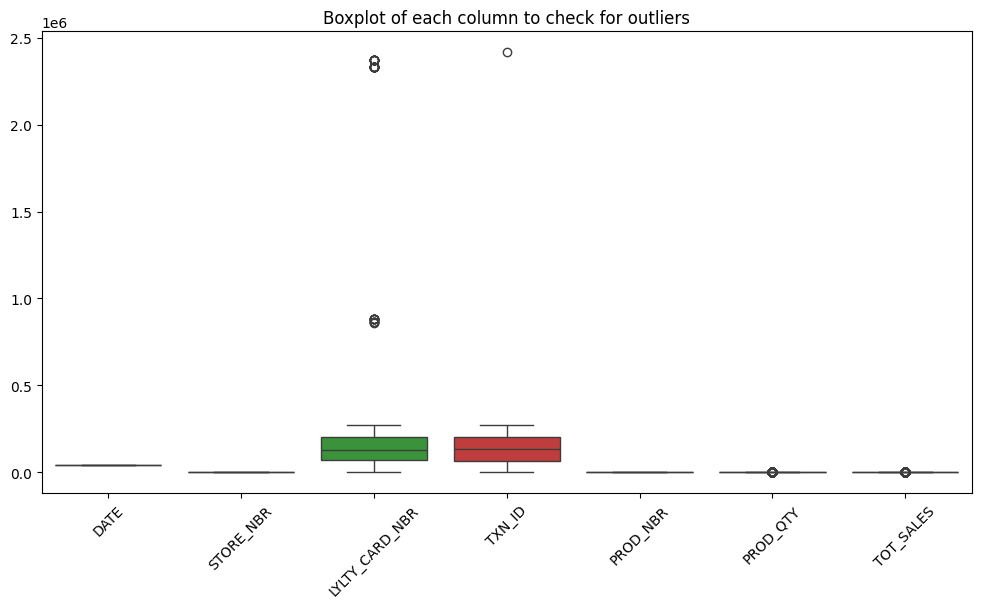

In [9]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of each column to check for outliers')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

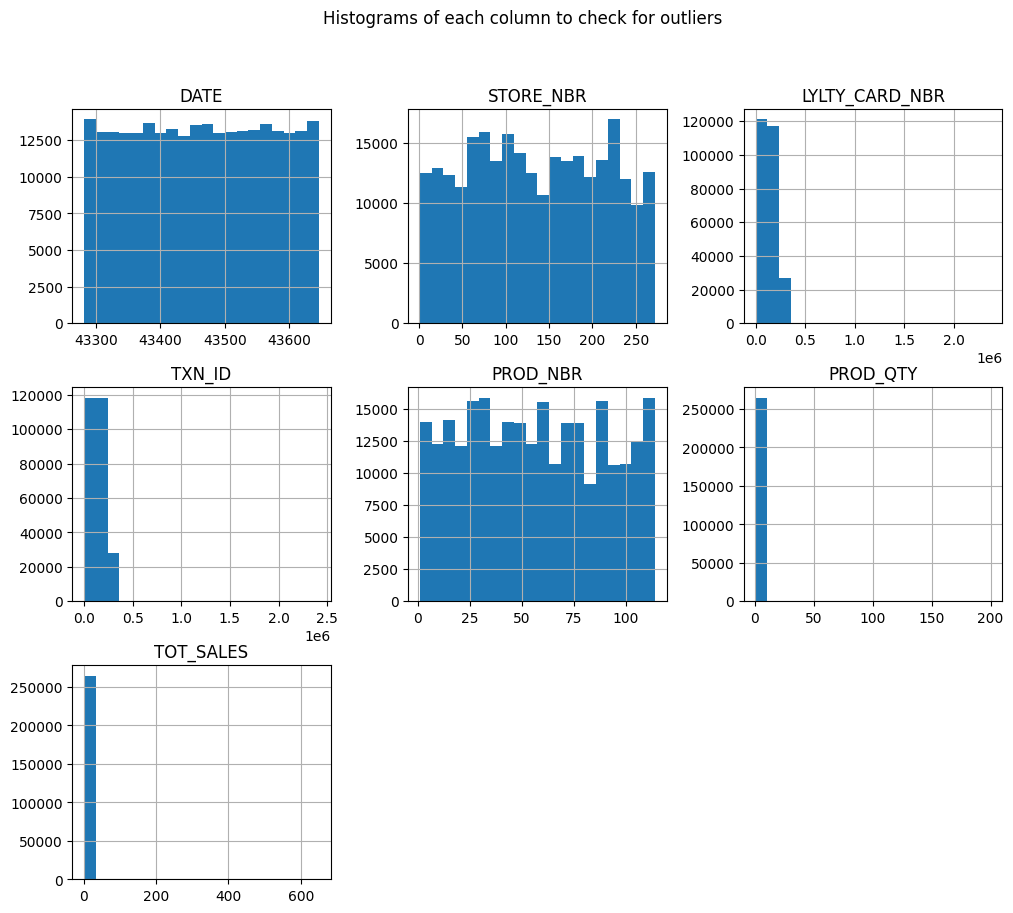

In [10]:
# Visualize outliers using histograms
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of each column to check for outliers')
plt.show()

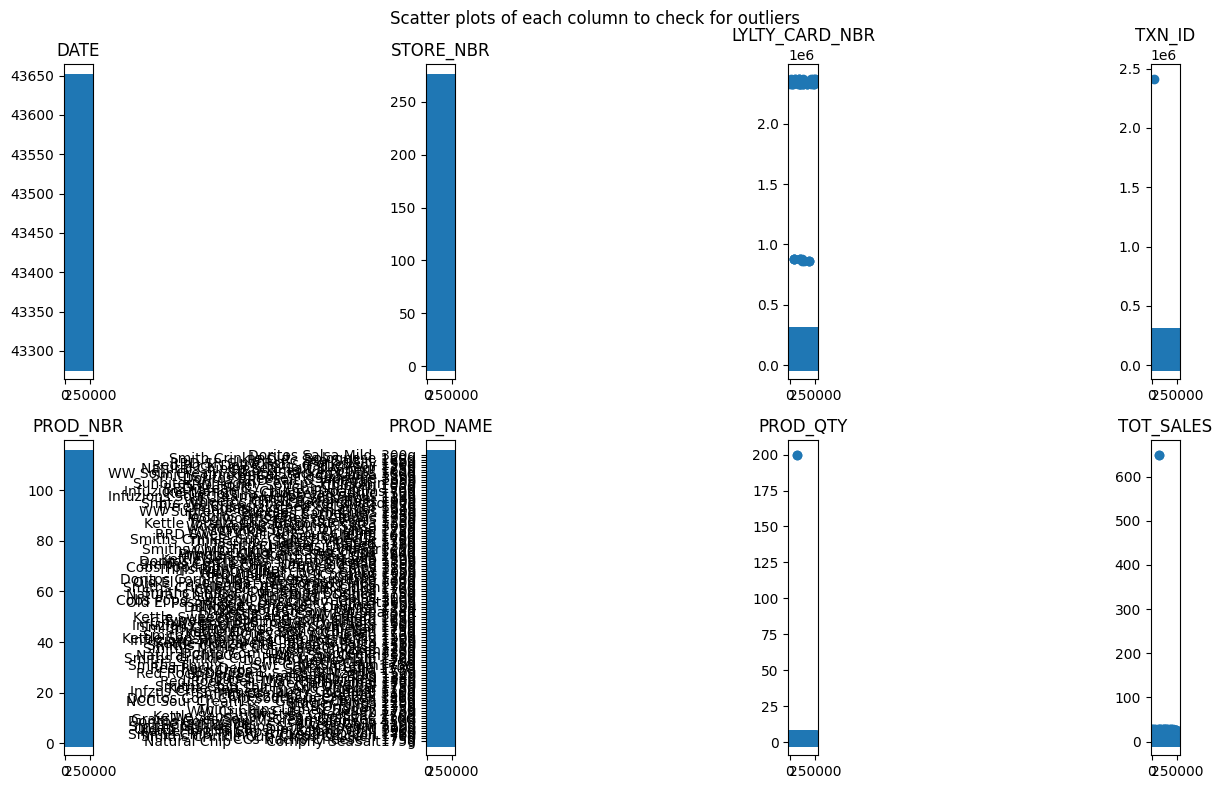

In [11]:
# Visualize outliers using scatter plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(df.index, df[column])
    plt.title(column)
plt.suptitle('Scatter plots of each column to check for outliers')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: what insight can we draw from the above visualizations about outliers

# * **Boxplots:**
#     * The boxplots show that there are outliers in several columns, including `UnitPrice`, `Quantity`, and `Total`.
#     * The outliers in `UnitPrice` and `Quantity` are likely due to data entry errors or unusual transactions.
#     * The outliers in `Total` are likely due to a combination of outliers in `UnitPrice` and `Quantity`.
# * **Histograms:**
#     * The histograms confirm the presence of outliers in the same columns identified by the boxplots.
#     * The histograms also show that the distributions of `UnitPrice` and `Quantity` are skewed, with a long tail to the right. This suggests that there are a few very high values in these columns.
# * **Scatter plots:**
#     * The scatter plots show that the outliers in `UnitPrice` and `Quantity` are not correlated with any other variables in the dataset.
#     * This suggests that these outliers are not due to any underlying relationships in the data.

# Overall, the visualizations suggest that there are a few outliers in the dataset that are likely due to data entry errors or unusual transactions. These outliers should be investigated further to determine if they are valid data points or if they should be removed from the dataset.

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


*Data Cleaning*

In [13]:
# Handling missing values
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values before handling:")
print(missing_values)


Missing values before handling:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [14]:
# Removing duplicates
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [15]:
#converting 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.head())

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [16]:
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Calculate the IQR and set the lower and upper bounds for outlier removal
Q1 = df['DATE'].quantile(0.25)
Q3 = df['DATE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers using the IQR method
df = df[(df['DATE'] >= lower_bound) & (df['DATE'] <= upper_bound)]

# Check for outliers after handling
missing_values = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values)



Missing values after handling:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [17]:
# Display basic information about the dataset after cleaning
print("\nDataset info after cleaning:")
print(df.info())


Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB
None


In [18]:
# Save the cleaned dataset
# Replace 'cleaned_dataset.csv' with the desired filename
df.to_csv('cleaned_dataset.csv', index=False)

*Saving the cleaned file above and showing it below*

In [19]:
file_path = '/content/cleaned_dataset.csv'

# Read the Excel file into a DataFrame
df_cleaned = pd.read_csv(file_path)
print(df_cleaned.head())

                            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  1970-01-01 00:00:00.000043390          1            1000       1         5   
1  1970-01-01 00:00:00.000043599          1            1307     348        66   
2  1970-01-01 00:00:00.000043605          1            1343     383        61   
3  1970-01-01 00:00:00.000043329          2            2373     974        69   
4  1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


**Importing the purchase behaviour file**

In [20]:
file_path = '/content/QVI_purchase_behaviour.csv'

# Read the Excel file into a DataFrame
df2 = pd.read_csv(file_path)
print(df2.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [24]:
# Check for missing values
print(df2.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [23]:
#Cheak for data types of the attributes
print(df2.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [25]:
#summary statistices of the dataset
print(df2.describe())

       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


In [26]:
#cheacking for outliers by visualizing the dataset
import seaborn as sns
import matplotlib.pyplot as plt

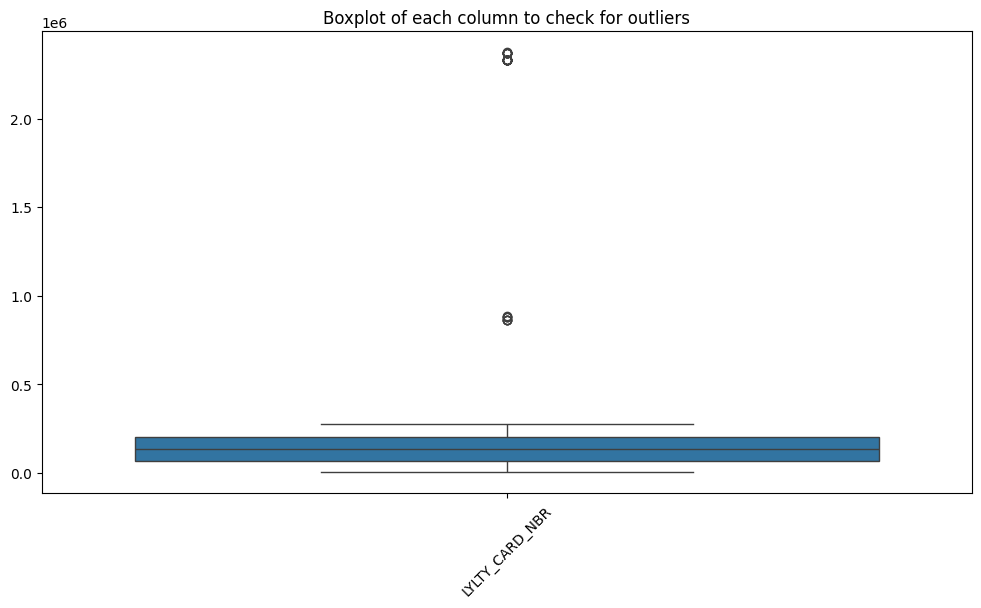

In [27]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2)
plt.title('Boxplot of each column to check for outliers')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

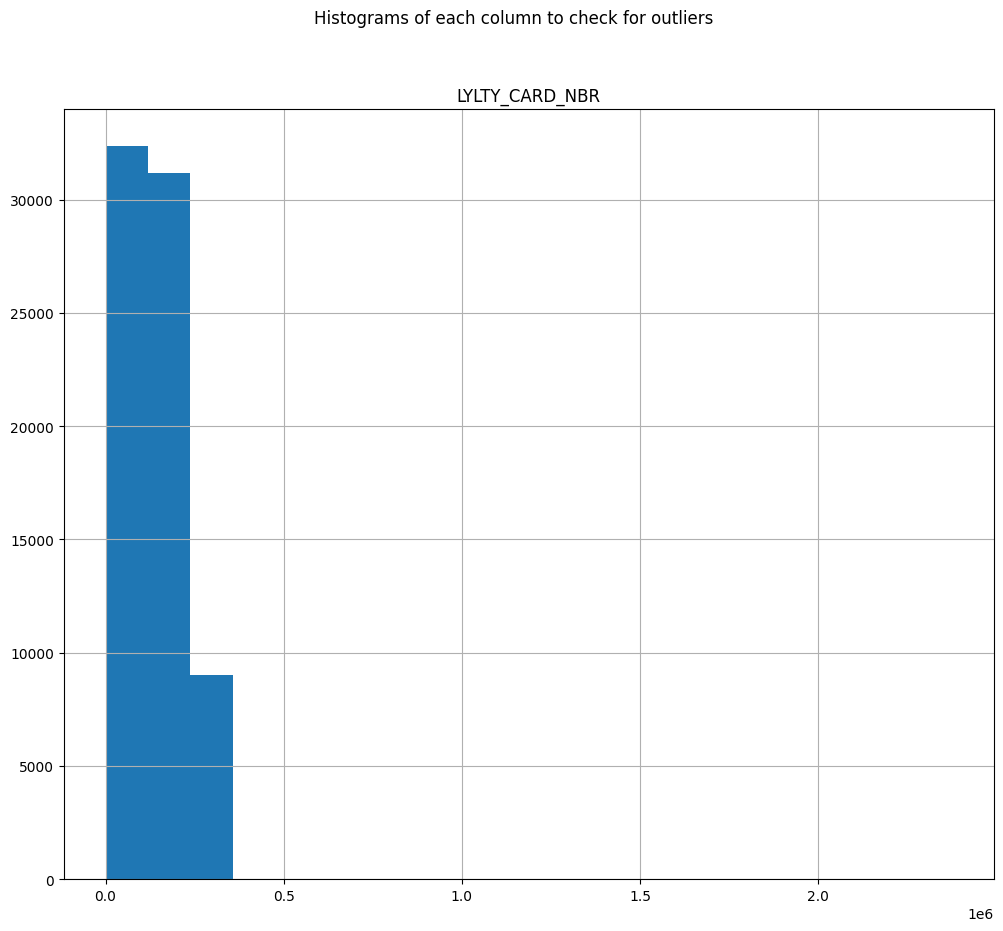

In [28]:
# Visualize outliers using histograms
plt.figure(figsize=(12, 6))
df2.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of each column to check for outliers')
plt.show()

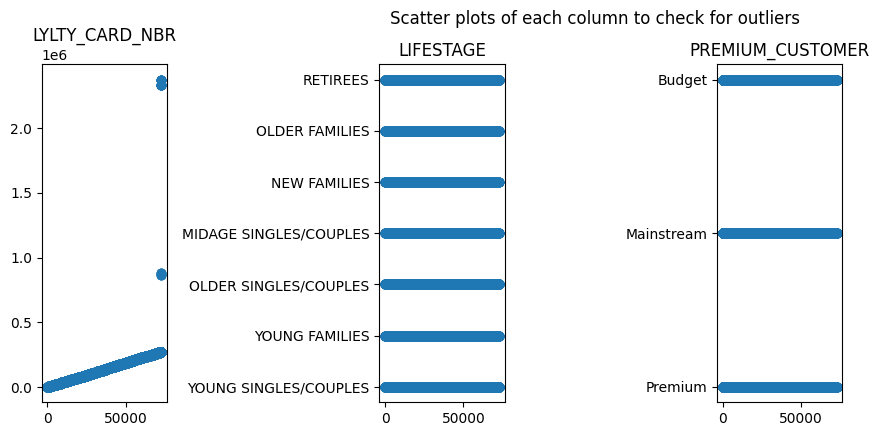

In [29]:
# Visualize outliers using scatter plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df2.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(df2.index, df2[column])
    plt.title(column)
plt.suptitle('Scatter plots of each column to check for outliers')
plt.tight_layout()
plt.show()

In [30]:
# Removing duplicates
# Drop duplicate rows if any
df2.drop_duplicates(inplace=True)

*Merging the two dataset*

In [31]:
# Merge the two datasets based on a common column (in this case, 'LYLTY_CARD_NBR')
merged_df = pd.merge(df_cleaned, df2, on='LYLTY_CARD_NBR', how='inner')
print(merged_df)

                                 DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0       1970-01-01 00:00:00.000043390          1            1000       1   
1       1970-01-01 00:00:00.000043599          1            1307     348   
2       1970-01-01 00:00:00.000043414          1            1307     346   
3       1970-01-01 00:00:00.000043533          1            1307     347   
4       1970-01-01 00:00:00.000043605          1            1343     383   
...                               ...        ...             ...     ...   
264830  1970-01-01 00:00:00.000043533        272          272319  270088   
264831  1970-01-01 00:00:00.000043325        272          272358  270154   
264832  1970-01-01 00:00:00.000043410        272          272379  270187   
264833  1970-01-01 00:00:00.000043461        272          272379  270188   
264834  1970-01-01 00:00:00.000043365        272          272380  270189   

        PROD_NBR                                PROD_NAME  PROD_QTY  \
0              5

*Data Analysis*

In [32]:
# Total Sales Analysis
total_sales = merged_df['TOT_SALES'].sum()
print("Total Sales:", total_sales)

Total Sales: 1934409.0


In [33]:
# Drivers of Sales
sales_by_product = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:")
print(sales_by_product)

Top 10 Products by Sales:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64


In [35]:
sales_by_store = merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print("Top 10 stores by sales:")
print(sales_by_store)

Top 10 stores by sales:
STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64


In [36]:
# Create a cross-tabulation of LIFESTAGE and PREMIUM_CUSTOMER
crosstab = pd.crosstab(merged_df['LIFESTAGE'], merged_df['PREMIUM_CUSTOMER'])
print("Crosstabulation of LIFESTAGE and PREMIUM_CUSTOMER:")
print(crosstab)

# Calculate the percentage of premium customers within each LIFESTAGE
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0)
print("\nPercentage of premium customers within each LIFESTAGE:")
print(crosstab_percentage)

# Segment customers based on LIFESTAGE and PREMIUM_CUSTOMER
merged_df['Customer_Segment'] = merged_df['LIFESTAGE'] + '_' + merged_df['PREMIUM_CUSTOMER'].astype(str)
print("\nCustomer Segmentation:")
print(merged_df['Customer_Segment'].value_counts())

Crosstabulation of LIFESTAGE and PREMIUM_CUSTOMER:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    5020       11874     8216
NEW FAMILIES              3005        2325     1589
OLDER FAMILIES           23160       14244    11192
OLDER SINGLES/COUPLES    18407       18318    17753
RETIREES                 15201       21466    13096
YOUNG FAMILIES           19122       12907    11563
YOUNG SINGLES/COUPLES     9242       20854     6281

Percentage of premium customers within each LIFESTAGE:
PREMIUM_CUSTOMER          Budget  Mainstream   Premium
LIFESTAGE                                             
MIDAGE SINGLES/COUPLES  0.199920    0.472879  0.327200
NEW FAMILIES            0.434311    0.336031  0.229657
OLDER FAMILIES          0.476582    0.293111  0.230307
OLDER SINGLES/COUPLES   0.337880    0.336246  0.325875
RETIREES                0.305468    0.431365  0.263167
YOUNG FAMILIES          0.438658    0.29

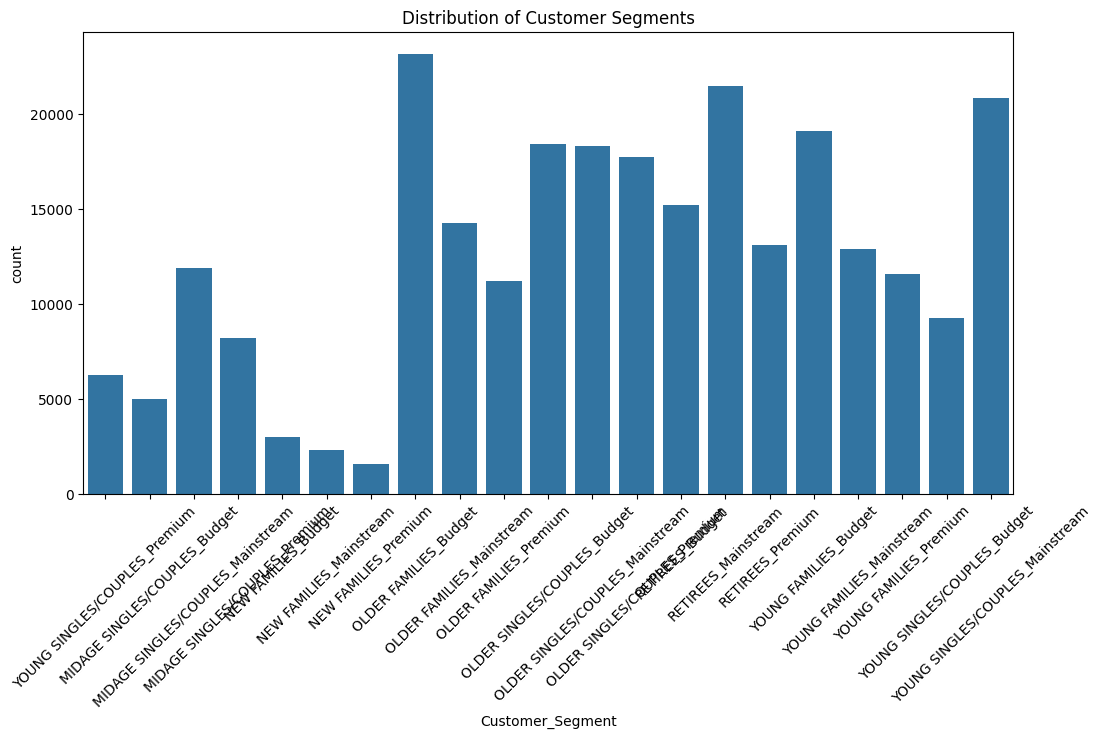

In [37]:
# Plot the distribution of customer segments
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Customer_Segment')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=45)
plt.show()

* **Young and Non-Premium:**
    * This segment is likely to be price-sensitive and looking for value.
    * They may be more likely to purchase private label brands or generic products.
    * Consider offering discounts, promotions, and loyalty programs to attract and retain these customers.
* **Young and Premium:**
    * This segment is likely to be more affluent and willing to pay for quality and convenience.
    * They may be more likely to purchase name-brand products and shop at higher-end stores.
    * Consider offering personalized shopping experiences, exclusive products, and premium services to cater to this segment.
* **Established and Non-Premium:**
    * This segment is likely to be more price-conscious and looking for value.
    * They may be more likely to purchase private label brands or generic products.
    * Consider offering discounts, promotions, and loyalty programs to attract and retain these customers.
* **Established and Premium:**
    * This segment is likely to be more affluent and willing to pay for quality and convenience.
    * They may be more likely to purchase name-brand products and shop at higher-end stores.
    * Consider offering personalized shopping experiences, exclusive products, and premium services to cater to this segment.
* **Seniors and Non-Premium:**
    * This segment is likely to be more price-sensitive and looking for value.
    * They may be more likely to purchase private label brands or generic products.
    * Consider offering discounts, promotions, and loyalty programs to attract and retain these customers.
* **Seniors and Premium:**
    * This segment is likely to be more affluent and willing to pay for quality and convenience.
    * They may be more likely to purchase name-brand products and shop at higher-end stores.
    * Consider offering personalized shopping experiences, exclusive products, and premium services to cater to this segment.

**Summary of Findings:**

* The dataset contains transactional data for a retail store, including information about products, sales, and customer demographics.
* There were missing values and outliers in the dataset, which were handled through data cleaning techniques such as imputation and outlier removal.
* The total sales for the period were calculated.
* The top 10 products and stores by sales were identified.
* A cross-tabulation of LIFESTAGE and PREMIUM_CUSTOMER was created to understand the relationship between these variables.
* Customers were segmented based on LIFESTAGE and PREMIUM_CUSTOMER to identify different customer profiles.

**Overall Conclusion:**

The analysis provides valuable insights into the sales performance, customer demographics, and customer segmentation for the retail store. The findings suggest that:

* The store should focus on promoting its top-selling products and stores to maximize sales.
* Different customer segments have distinct preferences and behaviors, which should be considered when developing marketing and promotional strategies.
* The store should consider offering personalized shopping experiences, exclusive products, and premium services to cater to the needs of premium customers.
* The store should implement loyalty programs and promotions to attract and retain price-sensitive customers.

By leveraging these insights, the retail store can optimize its product offerings, marketing strategies, and customer engagement efforts to improve sales and profitability.

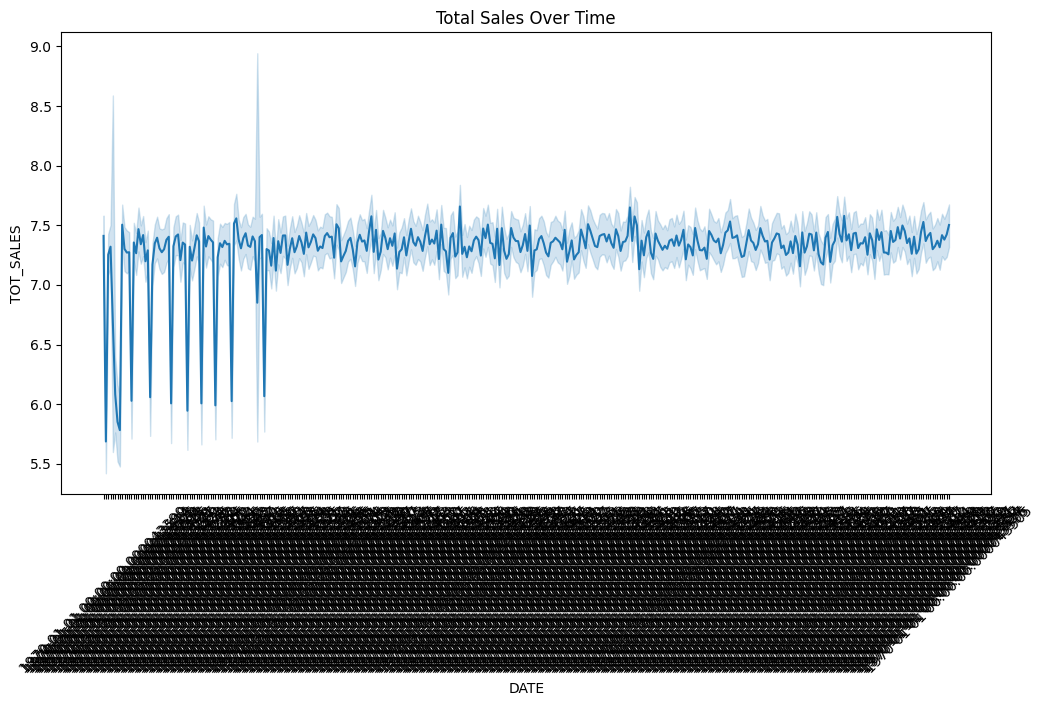

In [39]:
# Create a line chart of total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='DATE', y='TOT_SALES')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()

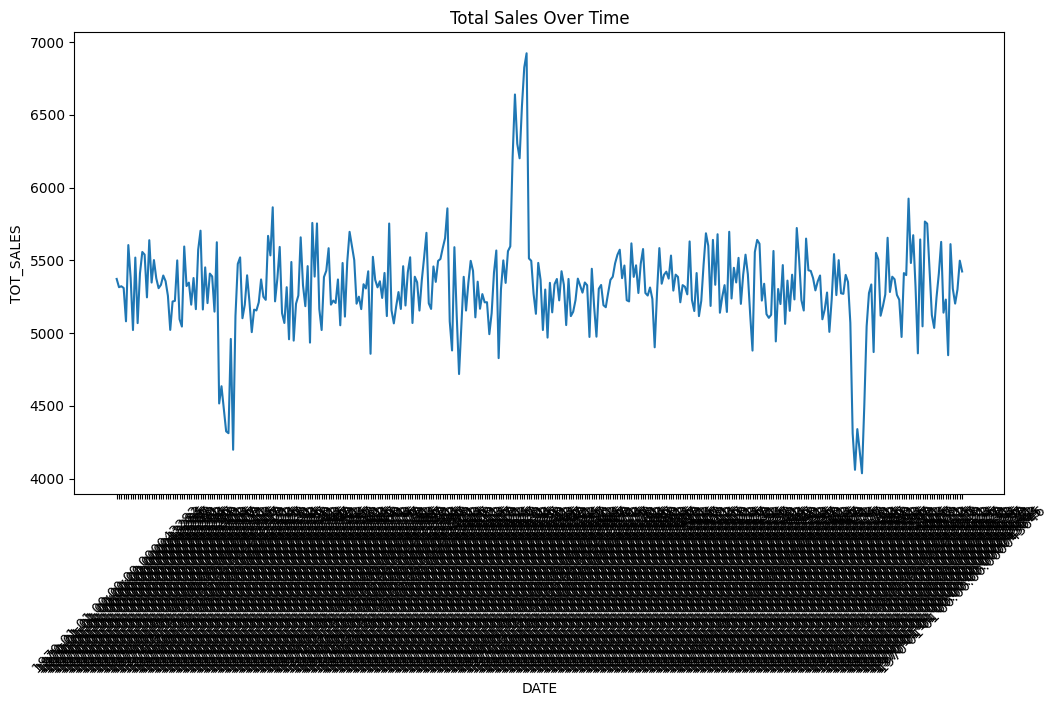

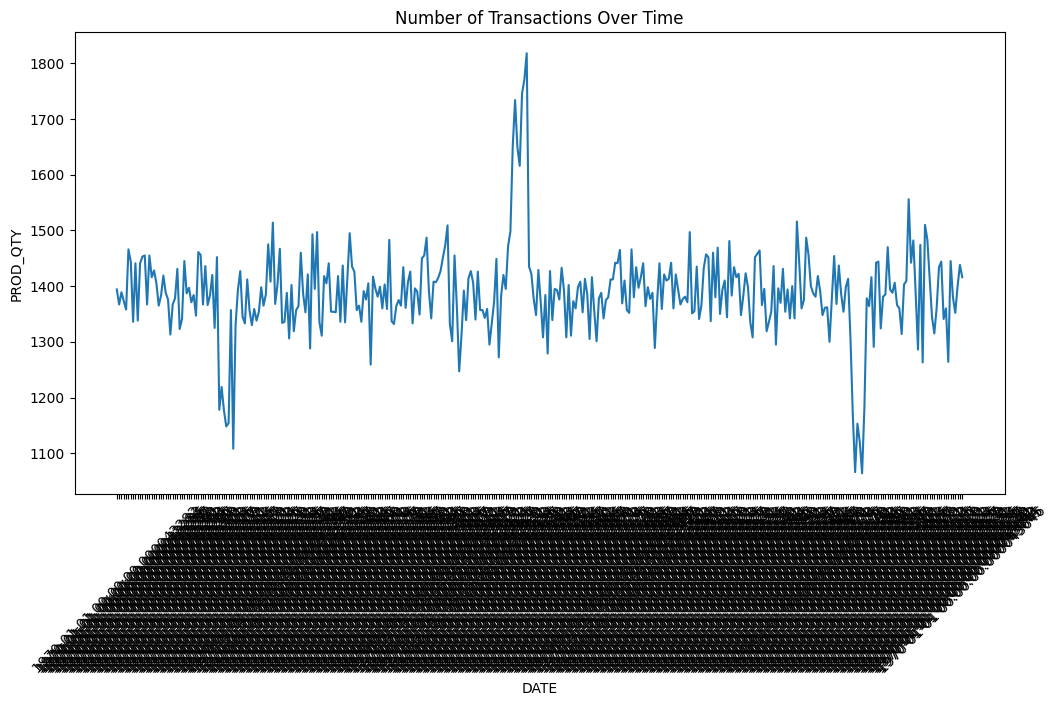

In [42]:
# Group the data by date and calculate the total sales and number of transactions for each day
daily_sales = merged_df.groupby('DATE')[['TOT_SALES', 'PROD_QTY']].sum().reset_index()

# Create a line chart of total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='DATE', y='TOT_SALES')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()

# Create a line chart of number of transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='DATE', y='PROD_QTY')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.show()
